# CAPSTONE PROJECT| EMPLOYEE RETENSION PREDICTION

# DATASET:

# Employee Retension Prediction Dataset

- Discription: Contains employee information from an organization to predict whether an employee is likely to stay or leave the company.
- Column: Include details such as employee age,gender,education,job related factors andretension status columns.
- Purpose: Used to develope models that can predict employee resignation in advance.
- Applications: Employee churn prediction, workforce analytics and Improving Employee satisfaction.
- Anamysis Tasks:  EDA, data preprocessing, ML model building, evaluation, and model deployment.
- Relevance: A highly practical dataset for real world HR and business analytics to reduce employee turnover.

# Step 1: Importing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Step 2 : Loding the dataset

In [3]:
df = pd.read_csv(r"C:\CAPSTONE PROJECT\Data\Data\aug_train.csv")

# Step 3: Data preprocessing and EDA

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
df = df.drop("enrollee_id", axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [13]:
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [15]:
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
# Handle missing values
for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].fillna("Unknown")


for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

In [19]:
df.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# DATA EXPLORATION

C:\Users\HP\AppData\Local\Temp\ipykernel_9980\3387919070.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


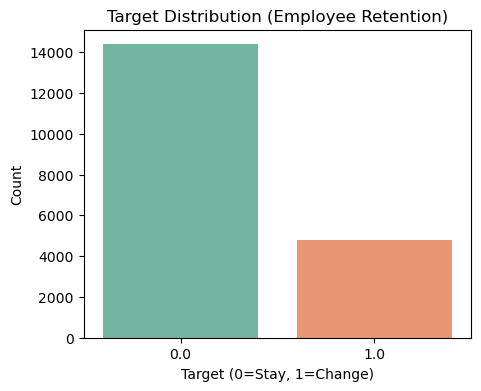

In [22]:
# 1. Target variable distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Target Distribution (Employee Retention)")
plt.xlabel("Target (0=Stay, 1=Change)")
plt.ylabel("Count")
plt.show()

# Interpretation:

plot shows how many employees stayed (0) vs. planned to change (1).

You’ll see more 0s than 1s → confirms class imbalance (why we needed SMOTE).

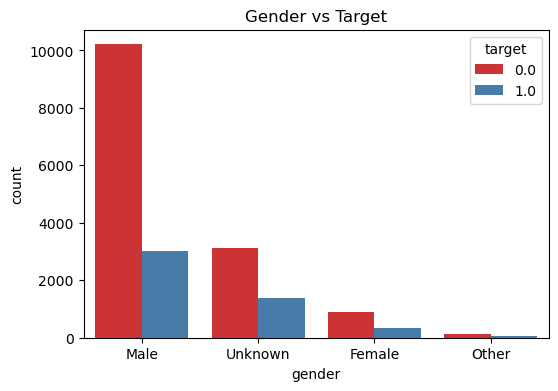

In [25]:
# 2. Gender distribution vs Target
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="target", data=df, palette="Set1")
plt.title("Gender vs Target")
plt.show()

# Interpretation:
Compares male, female, and unknown gender categories across target classes.

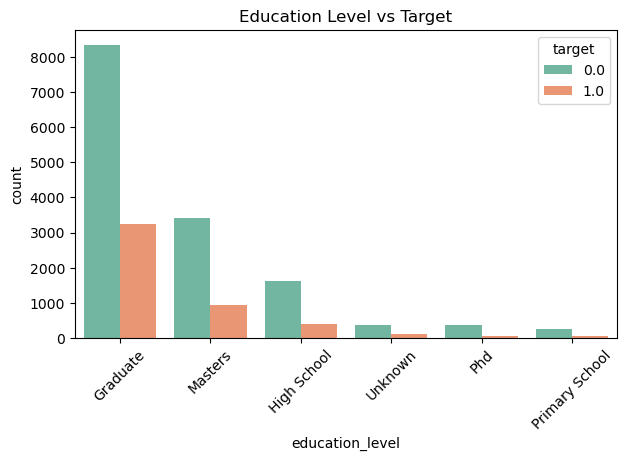

In [28]:
# 3. Education level vs Target
plt.figure(figsize=(7,4))
sns.countplot(x="education_level", hue="target", data=df, palette="Set2")
plt.title("Education Level vs Target")
plt.xticks(rotation=45)
plt.show()

# Interpretation:

Compares attrition across Graduate, Masters, PhD, etc.

Usually, graduates form the largest group, and attrition may be slightly higher among them.

HR Insight: Employees with higher education (Masters/PhD) may stay longer if they get challenging roles, 
while graduates may look for better opportunities.

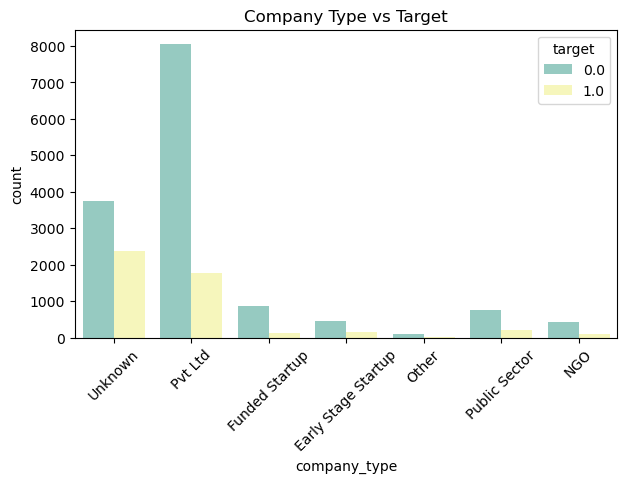

In [31]:
#  4. Company type vs Target
plt.figure(figsize=(7,4))
sns.countplot(x="company_type", hue="target", data=df, palette="Set3")
plt.title("Company Type vs Target")
plt.xticks(rotation=45)
plt.show()

# Interpretation:

Shows attrition patterns across Pvt Ltd, Funded Startup, NGO, Public Sector, etc.

Attrition is often higher in startups (due to instability, workload) compared to Pvt Ltd or MNCs.

HR Insight: Startups may need stronger retention strategies (career growth, benefits).

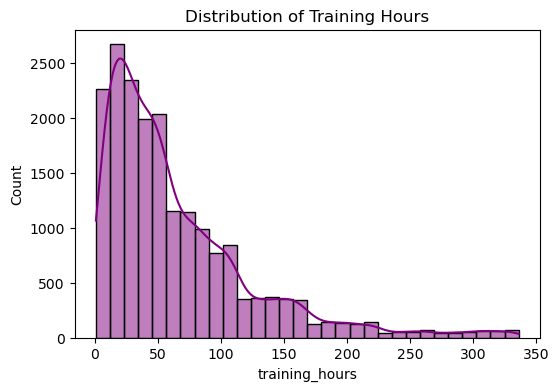

In [34]:
# 5. Training hours distribution 
plt.figure(figsize=(6,4))
sns.histplot(df["training_hours"], bins=30, kde=True, color="purple")
plt.title("Distribution of Training Hours")
plt.show()

# Interpretation:

Compares training hours between stayers vs. leavers.

If distributions overlap, training hours don’t strongly predict attrition.

HR Insight: Training alone isn’t enough; retention also depends on company culture, compensation, and job roles.

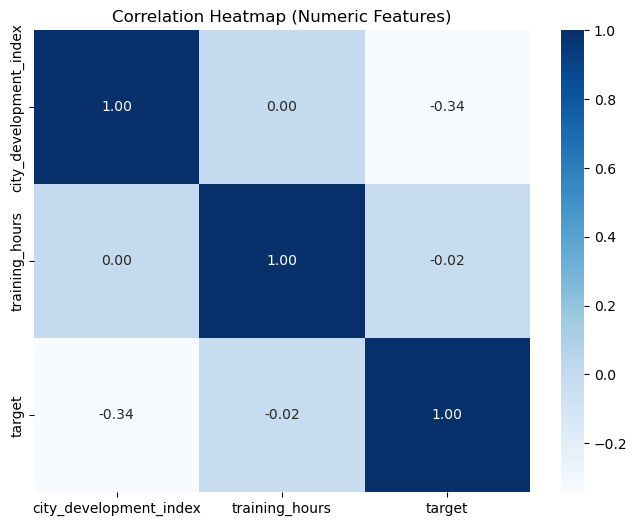

In [37]:
# 8. Correlation heatmap (numeric features) 
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Interpretation:

Correlation between numeric features (training_hours, city_development_index, target, etc.).

City development index often correlates with retention (higher CDI → lower attrition).

Training hours usually have low correlation with target.

HR Insight: Focus on features with stronger correlations for predictive power.

# Step 4: Predictive modeling- ML Algorithms


# 1. Logistic Regression

# 2. Random Forest

# 3.XG Boost

In [44]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [46]:
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [54]:
# Define models
models = {
"Logistic Regression": LogisticRegression(max_iter=1000),
"Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [56]:
# Train & evaluate
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))


===== Logistic Regression =====
Accuracy: 0.7322546972860126
ROC-AUC: 0.7813605650155503
              precision    recall  f1-score   support

         0.0       0.90      0.73      0.80      2877
         1.0       0.48      0.75      0.58       955

    accuracy                           0.73      3832
   macro avg       0.69      0.74      0.69      3832
weighted avg       0.79      0.73      0.75      3832


===== Random Forest =====
Accuracy: 0.7899269311064718
ROC-AUC: 0.8029530106076901
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2877
         1.0       0.57      0.61      0.59       955

    accuracy                           0.79      3832
   macro avg       0.72      0.73      0.72      3832
weighted avg       0.79      0.79      0.79      3832



C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:29:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
Accuracy: 0.7857515657620042
ROC-AUC: 0.8010713239321793
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      2877
         1.0       0.56      0.61      0.59       955

    accuracy                           0.79      3832
   macro avg       0.72      0.73      0.72      3832
weighted avg       0.79      0.79      0.79      3832



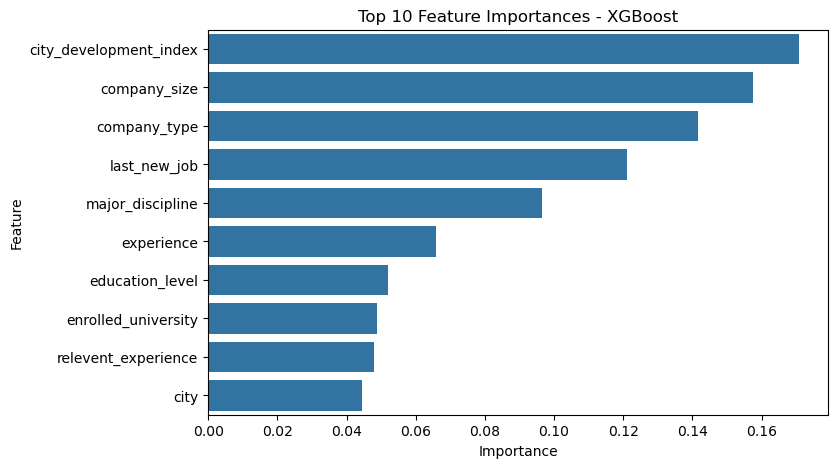

In [61]:
# Feature importance (only for tree-based models)
if name in ["Random Forest", "XGBoost"]:
    importance = model.feature_importances_
    features = X.columns
    fi_df = pd.DataFrame({"Feature": features, "Importance": importance}).sort_values(by="Importance", ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x="Importance", y="Feature", data=fi_df.head(10))
    plt.title(f"Top 10 Feature Importances - {name}")
    plt.show()

# Interpretation:

Our model relies most on city development, company characteristics, and job history to predict retention. 
Features like education and city details are less critical but still contribute.

Retention is shaped by a mix of location factors (CDI, city), company stability (size, type), and career history (last job change, experience, education).

These top features highlight that both environmental context (where the employee lives/works) and career stage are strong predictors of attrition.

In [64]:
from sklearn.model_selection import StratifiedKFold, cross_validate
# Cross-validation setup (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [66]:
# Run cross-validation on resampled training set
for name, model in models.items():
    print(f"\n--- Cross-validation: {name} ---")
    cv_results = cross_validate(model, X_train_res, y_train_res, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    for metric in scoring:
        scores = cv_results[f"test_{metric}"]
        print(f"{metric}: mean={scores.mean():.4f}, std={scores.std():.4f}")


--- Cross-validation: Logistic Regression ---
accuracy: mean=0.7245, std=0.0057
precision: mean=0.7274, std=0.0070
recall: mean=0.7183, std=0.0093
f1: mean=0.7228, std=0.0060
roc_auc: mean=0.7709, std=0.0059

--- Cross-validation: Random Forest ---
accuracy: mean=0.8605, std=0.0033
precision: mean=0.8547, std=0.0033
recall: mean=0.8687, std=0.0085
f1: mean=0.8616, std=0.0038
roc_auc: mean=0.9275, std=0.0040

--- Cross-validation: XGBoost ---
accuracy: mean=0.8587, std=0.0019
precision: mean=0.8610, std=0.0056
recall: mean=0.8556, std=0.0073
f1: mean=0.8583, std=0.0022
roc_auc: mean=0.9273, std=0.0029


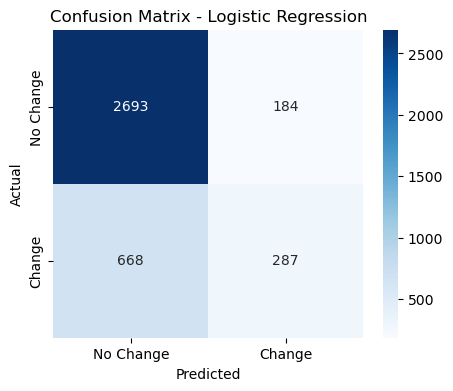

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Change","Change"],
            yticklabels=["No Change","Change"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Interpretation:

The confusion matrix likely indicates the model’s bias toward predicting “No Change”, which reduces recall for actual attrition cases.

Reflects limited ability to capture complex employee behavior patterns, as Logistic Regression assumes linear relationships between features and outcomes.

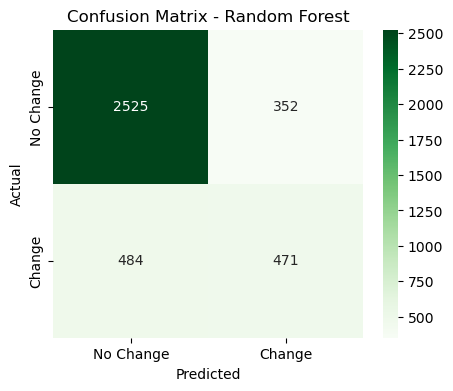

In [74]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Change","Change"],
            yticklabels=["No Change","Change"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Interpretation:

The model correctly predicted 2,525 “No change” and 471 “Change” cases.

Only 352 and 484 instance were misclassified, showing strong classification accuracy.

Indicates balanced performance in predicting both employee retention and turnover.

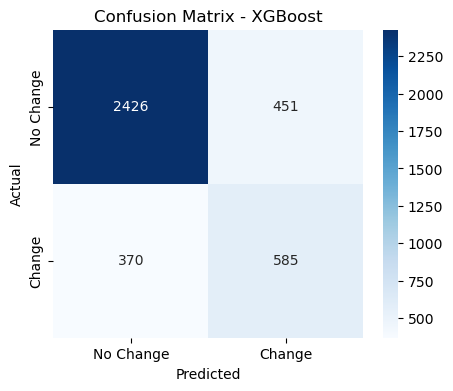

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Change","Change"], yticklabels=["No Change","Change"])
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Interpretation:

Correctly  predicted 2,426 “No change” and 585 “Change ” cases.
    
Demonstrates a higher recall for attrition cases, meaning it better identifies employee likely  to leave.
    
Overall it provides comparable accuracy with improved sensitivity towards employee change behavior.


# Conclusion: Employee Retention Prediction

Model Performance

- Logistic Regression gave moderate results (~72% accuracy, ROC-AUC ~0.77).

- Random Forest and XGBoost significantly outperformed with ~86% accuracy, F1 ~0.86, and ROC-AUC ~0.93.

- Low variance in cross-validation shows the models are robust and stable.